In [1]:
import pandas as pd
import matplotlib.pyplot as plt

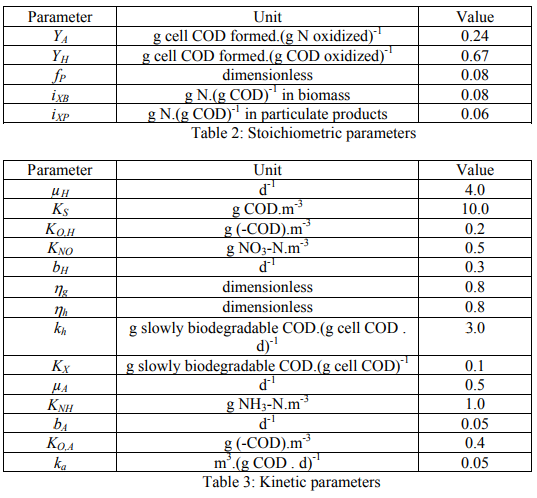

In [2]:
def calcularho(Si,Ss,Xi,Xs,Xbh,Xba,Xp,So,Sno,Snh,Snd,Xnd,Salk):
  YA=0.24
  YH=0.67
  fp=0.08
  iXB=0.08
  iXP=0.06

  muH=4
  Ks=10
  KOH=0.2
  KNO=0.5
  bH=0.3
  ng=0.8
  nh=0.8
  kh=3
  KX=0.1
  muA=0.5
  KNH=1
  bA=0.05
  KOA=0.4
  ka=0.05

  rho1=muH*Xbh*(Ss*So/((Ks+Ss)*(KOH+So)))
  rho2=muH*Xbh*ng*(Ss*KOH*Sno/((Ks+Ss)*(KOH+So)*(KNO+Sno)))
  rho3=muH*Xba*(Snh*So/((KNH+Snh)*(KOA+So)))
  rho4=bH*Xbh
  rho5=bA*Xba
  rho6=ka*Snd*Xbh
  rho7=kh*((Xs/Xbh)/(KX+(Xs/Xbh)))*(So/(KOH+So)+nh*(KOH/(KOH+So))*(Sno/(KNO+Sno)))*Xbh
  rho8=rho7*(Xnd/Xs)
  return [rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8]

In [3]:
def calcular(Si,Ss,Xi,Xs,Xbh,Xba,Xp,So,Sno,Snh,Snd,Xnd,Salk):
  rho=calcularho(Si,Ss,Xi,Xs,Xbh,Xba,Xp,So,Sno,Snh,Snd,Xnd,Salk)
  rho1=rho[0]
  rho2=rho[1]
  rho3=rho[2]
  rho4=rho[3]
  rho5=rho[4]
  rho6=rho[5]
  rho7=rho[6]
  rho8=rho[7]
  YA=0.24
  YH=0.67
  fp=0.08
  iXB=0.08
  iXP=0.06

  muH=4
  Ks=10
  KOH=0.2
  KNO=0.5
  bH=0.3
  ng=0.8
  nh=0.8
  kh=3
  KX=0.1
  muA=0.5
  KNH=1
  bA=0.05
  KOA=0.4
  ka=0.05
  
  r1=0
  r2=(-rho1-rho2)/YH+rho7
  r3=0
  r4=(1-fp)*(rho4+rho5)-rho7
  r5=rho1+rho2-rho4
  r6=rho3-rho5
  r7=fp*(rho4+rho5)
  r8=-(1-YH)*rho1/YH-(4.57-YA)*rho3/YA
  r9=-(1-YH)*rho2/(2.86*YH)+rho3/YA
  r10=-iXB*(rho1+rho2)-(iXB+1/YA)*rho3+rho6
  r11=rho8-rho6
  r12=(iXB-fp*iXP)*(rho4+rho5)-rho8
  r13=-iXB*rho1/14+((1-YH)/(14*2.86*YH)-iXB/14)*rho2-(iXB/14+(1/(7*YA)))*rho3+rho6/14
  return [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13]

In [4]:
def escalona_matriz(m1,b1):
  m=m1
  b=b1
  cnt1=0
  while cnt1<len(m):
    cnt2=cnt1+1
    while cnt2<len(m):
      if m[cnt1][cnt1]!=0:
        r=m[cnt2][cnt1]/m[cnt1][cnt1]
        b[cnt2]=b[cnt2]-b[cnt1]*r
        cnt3=cnt1
        while cnt3<len(m[0]):
          m[cnt2][cnt3]=m[cnt2][cnt3]-m[cnt1][cnt3]*r
          cnt3=cnt3+1
        cnt2=cnt2+1
    cnt1=cnt1+1
  return (m,b)
def metodo1(m1,b1): # eliminação de gauss
  mb=escalona_matriz(m1,b1)
  m=mb[0]
  b=mb[1]
  C=[]
  for i in b:
    C.append(0)
  cnt1=len(m)-1
  while cnt1>=0:
    cnt2=len(m)-1
    C[cnt1]=b[cnt1]
    while cnt2>cnt1:
      C[cnt1]=C[cnt1]-m[cnt1][cnt2]*C[cnt2]
      cnt2=cnt2-1
    C[cnt1]=C[cnt1]/m[cnt1][cnt2]
    cnt1=cnt1-1
  return C

$
Q_1=Q_a+Q_r+Q_0 \\
Q_1=Q_2=Q_3=Q_4=Q_5 \\
Q_f=Q_5-Q_a \\
Q_f=Q_1-Q_a \\
Q_f=Q_e+Q_u \\
Q_u=Q_r+Q_w \\
Q_0=Q_w+Q_e \\
$
<br>
$
Q_0=18446m^3/d \\
Q_r=18446m^3/d \\
Q_w=385m^3/d \\
Q_a=55338m^3/d \\
Q_0-Q_w=Q_e \\
Q_e=18061m^3/d \\
$
<br>
$
Q_1=55338+18446+18446=92230m^3/d \\
Q_f=Q_1-55338=36892m^3/d \\
Q_u=Q_f-18061=18831 \\
$

In [5]:
Q0=18446
Q1=92230
Q2=92230
Q3=92230
Q4=92230
Qr=18446
Qw=385
Qa=55338
Qe=18061
Q5=92230
Qf=36892
Qu=18831
V1=1000
V2=1000
V3=1333
V4=1333
V5=1333
KLA=240
so_=8

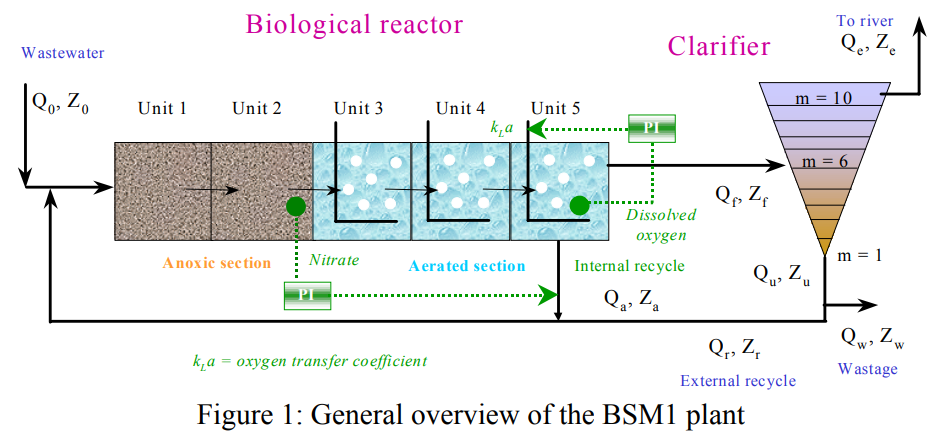

# Derivadas nos tanques

In [6]:
def ddt_1(Za,Zr,Z0,r,Z1):
  return (Qa*Za+Qr*Zr+Q0*Z0+r*V1-Q1*Z1)/V1
def derivadas_tanque1():
  #saída a
  Sia=_a[-1][0]
  Ssa=_a[-1][1]
  Xia=_a[-1][2]
  Xsa=_a[-1][3]
  Xbha=_a[-1][4]
  Xbaa=_a[-1][5]
  Xpa=_a[-1][6]
  Soa=_a[-1][7]
  Snoa=_a[-1][8]
  Snha=_a[-1][9]
  Snda=_a[-1][10]
  Xnda=_a[-1][11]
  Salka=_a[-1][12]
  #saída r
  Sir=_r[-1][0]
  Ssr=_r[-1][1]
  Xir=_r[-1][2]
  Xsr=_r[-1][3]
  Xbhr=_r[-1][4]
  Xbar=_r[-1][5]
  Xpr=_r[-1][6]
  Sor=_r[-1][7]
  Snor=_r[-1][8]
  Snhr=_r[-1][9]
  Sndr=_r[-1][10]
  Xndr=_r[-1][11]
  Salkr=_r[-1][12]
  #entrada 0
  Si0=_o[-1][0]
  Ss0=_o[-1][1]
  Xi0=_o[-1][2]
  Xs0=_o[-1][3]
  Xbh0=_o[-1][4]
  Xba0=_o[-1][5]
  Xp0=_o[-1][6]
  So0=_o[-1][7]
  Sno0=_o[-1][8]
  Snh0=_o[-1][9]
  Snd0=_o[-1][10]
  Xnd0=_o[-1][11]
  Salk0=_o[-1][12]
  #tanque 1
  Si1=un1[-1][0]
  Ss1=un1[-1][1]
  Xi1=un1[-1][2]
  Xs1=un1[-1][3]
  Xbh1=un1[-1][4]
  Xba1=un1[-1][5]
  Xp1=un1[-1][6]
  So1=un1[-1][7]
  Sno1=un1[-1][8]
  Snh1=un1[-1][9]
  Snd1=un1[-1][10]
  Xnd1=un1[-1][11]
  Salk1=un1[-1][12]
  r=calcular(Si1,Ss1,Xi1,Xs1,Xbh1,Xba1,Xp1,So1,Sno1,Snh1,Snd1,Xnd1,Salk1)
  r1=r[0]
  r2=r[1]
  r3=r[2]
  r4=r[3]
  r5=r[4]
  r6=r[5]
  r7=r[6]
  r8=r[7]
  r9=r[8]
  r10=r[9]
  r11=r[10]
  r12=r[11]
  r13=r[12]

  dSidt=ddt_1(Sia,Sir,Si0,r1,Si1)
  dSsdt=ddt_1(Ssa,Ssr,Ss0,r2,Ss1)
  dXidt=ddt_1(Xia,Xir,Xi0,r3,Xi1)
  dXsdt=ddt_1(Xsa,Xsr,Xs0,r4,Xs1)
  dXbhdt=ddt_1(Xbha,Xbhr,Xbh0,r5,Xbh1)
  dXbadt=ddt_1(Xbaa,Xbar,Xba0,r6,Xba1)
  dXpdt=ddt_1(Xpa,Xpr,Xp0,r7,Xp1)
  dSodt=0
  dSnodt=ddt_1(Snoa,Snor,Sno0,r9,Sno1)
  dSnhdt=ddt_1(Snha,Snhr,Snh0,r10,Snh1)
  dSnddt=ddt_1(Snda,Sndr,Snd0,r11,Snd1)
  dXnddt=ddt_1(Xnda,Xndr,Xnd0,r12,Xnd1)
  dSalkdt=ddt_1(Salka,Salkr,Salk0,r13,Salk1)
  return [dSidt,dSsdt,dXidt,dXsdt,dXbhdt,dXbadt,dXpdt,dSodt,dSnodt,dSnhdt,dSnddt,dXnddt,dSalkdt]

In [7]:
def ddt_2(Z1,Z2,r):
  return (Q2*(Z1-Z2)+r*V2)/V2
def derivadas_tanque2():
  #tanque 1
  Si1=un1[-1][0]
  Ss1=un1[-1][1]
  Xi1=un1[-1][2]
  Xs1=un1[-1][3]
  Xbh1=un1[-1][4]
  Xba1=un1[-1][5]
  Xp1=un1[-1][6]
  So1=un1[-1][7]
  Sno1=un1[-1][8]
  Snh1=un1[-1][9]
  Snd1=un1[-1][10]
  Xnd1=un1[-1][11]
  Salk1=un1[-1][12]
  #tanque 2
  Si2=un2[-1][0]
  Ss2=un2[-1][1]
  Xi2=un2[-1][2]
  Xs2=un2[-1][3]
  Xbh2=un2[-1][4]
  Xba2=un2[-1][5]
  Xp2=un2[-1][6]
  So2=un2[-1][7]
  Sno2=un2[-1][8]
  Snh2=un2[-1][9]
  Snd2=un2[-1][10]
  Xnd2=un2[-1][11]
  Salk2=un2[-1][12]
  r=calcular(Si2,Ss2,Xi2,Xs2,Xbh2,Xba2,Xp2,So2,Sno2,Snh2,Snd2,Xnd2,Salk2)
  r1=r[0]
  r2=r[1]
  r3=r[2]
  r4=r[3]
  r5=r[4]
  r6=r[5]
  r7=r[6]
  r8=r[7]
  r9=r[8]
  r10=r[9]
  r11=r[10]
  r12=r[11]
  r13=r[12]

  dSidt=ddt_2(Si1,Si2,r1)
  dSsdt=ddt_2(Ss1,Ss2,r2)
  dXidt=ddt_2(Xi1,Xi2,r3)
  dXsdt=ddt_2(Xs1,Xs2,r4)
  dXbhdt=ddt_2(Xbh1,Xbh2,r5)
  dXbadt=ddt_2(Xba1,Xba2,r6)
  dXpdt=ddt_2(Xp1,Xp2,r7)
  dSodt=0
  dSnodt=ddt_2(Sno1,Sno2,r9)
  dSnhdt=ddt_2(Snh1,Snh2,r10)
  dSnddt=ddt_2(Snd1,Snd2,r11)
  dXnddt=ddt_2(Xnd1,Xnd2,r12)
  dSalkdt=ddt_2(Salk1,Salk2,r13)
  return [dSidt,dSsdt,dXidt,dXsdt,dXbhdt,dXbadt,dXpdt,dSodt,dSnodt,dSnhdt,dSnddt,dXnddt,dSalkdt]

In [8]:
def ddt_3(Z2,Z3,r):
  return (Q3*(Z2-Z3)+r*V3)/V3
def derivadas_tanque3():
  #tanque 2
  Si2=un2[-1][0]
  Ss2=un2[-1][1]
  Xi2=un2[-1][2]
  Xs2=un2[-1][3]
  Xbh2=un2[-1][4]
  Xba2=un2[-1][5]
  Xp2=un2[-1][6]
  So2=un2[-1][7]
  Sno2=un2[-1][8]
  Snh2=un2[-1][9]
  Snd2=un2[-1][10]
  Xnd2=un2[-1][11]
  Salk2=un2[-1][12]
  #tanque 3
  Si3=un3[-1][0]
  Ss3=un3[-1][1]
  Xi3=un3[-1][2]
  Xs3=un3[-1][3]
  Xbh3=un3[-1][4]
  Xba3=un3[-1][5]
  Xp3=un3[-1][6]
  So3=un3[-1][7]
  Sno3=un3[-1][8]
  Snh3=un3[-1][9]
  Snd3=un3[-1][10]
  Xnd3=un3[-1][11]
  Salk3=un3[-1][12]
  r=calcular(Si3,Ss3,Xi3,Xs3,Xbh3,Xba3,Xp3,So3,Sno3,Snh3,Snd3,Xnd3,Salk3)
  r1=r[0]
  r2=r[1]
  r3=r[2]
  r4=r[3]
  r5=r[4]
  r6=r[5]
  r7=r[6]
  r8=r[7]
  r9=r[8]
  r10=r[9]
  r11=r[10]
  r12=r[11]
  r13=r[12]

  dSidt=ddt_3(Si2,Si3,r1)
  dSsdt=ddt_3(Ss2,Ss3,r2)
  dXidt=ddt_3(Xi2,Xi3,r3)
  dXsdt=ddt_3(Xs2,Xs3,r4)
  dXbhdt=ddt_3(Xbh2,Xbh3,r5)
  dXbadt=ddt_3(Xba2,Xba3,r6)
  dXpdt=ddt_3(Xp2,Xp3,r7)
  dSodt=(Q2*So2+r8*V3+KLA*V3*(so_-So3)-Q3*So3)/V3
  dSnodt=ddt_3(Sno2,Sno3,r9)
  dSnhdt=ddt_3(Snh2,Snh3,r10)
  dSnddt=ddt_3(Snd2,Snd3,r11)
  dXnddt=ddt_3(Xnd2,Xnd3,r12)
  dSalkdt=ddt_3(Salk2,Salk3,r13)
  return [dSidt,dSsdt,dXidt,dXsdt,dXbhdt,dXbadt,dXpdt,dSodt,dSnodt,dSnhdt,dSnddt,dXnddt,dSalkdt]

In [9]:
def ddt_4(Z3,Z4,r):
  return (Q4*(Z3-Z4)+r*V4)/V4
def derivadas_tanque4():
  #tanque 3
  Si3=un3[-1][0]
  Ss3=un3[-1][1]
  Xi3=un3[-1][2]
  Xs3=un3[-1][3]
  Xbh3=un3[-1][4]
  Xba3=un3[-1][5]
  Xp3=un3[-1][6]
  So3=un3[-1][7]
  Sno3=un3[-1][8]
  Snh3=un3[-1][9]
  Snd3=un3[-1][10]
  Xnd3=un3[-1][11]
  Salk3=un3[-1][12]
  #tanque 4
  Si4=un4[-1][0]
  Ss4=un4[-1][1]
  Xi4=un4[-1][2]
  Xs4=un4[-1][3]
  Xbh4=un4[-1][4]
  Xba4=un4[-1][5]
  Xp4=un4[-1][6]
  So4=un4[-1][7]
  Sno4=un4[-1][8]
  Snh4=un4[-1][9]
  Snd4=un4[-1][10]
  Xnd4=un4[-1][11]
  Salk4=un4[-1][12]
  r=calcular(Si4,Ss4,Xi4,Xs4,Xbh4,Xba4,Xp4,So4,Sno4,Snh4,Snd4,Xnd4,Salk4)
  r1=r[0]
  r2=r[1]
  r3=r[2]
  r4=r[3]
  r5=r[4]
  r6=r[5]
  r7=r[6]
  r8=r[7]
  r9=r[8]
  r10=r[9]
  r11=r[10]
  r12=r[11]
  r13=r[12]

  dSidt=ddt_4(Si3,Si4,r1)
  dSsdt=ddt_4(Ss3,Ss4,r2)
  dXidt=ddt_4(Xi3,Xi4,r3)
  dXsdt=ddt_4(Xs3,Xs4,r4)
  dXbhdt=ddt_4(Xbh3,Xbh4,r5)
  dXbadt=ddt_4(Xba3,Xba4,r6)
  dXpdt=ddt_4(Xp3,Xp4,r7)
  dSodt=(Q3*So3+r8*V4+KLA*V4*(so_-So4)-Q4*So4)/V4
  dSnodt=ddt_4(Sno3,Sno4,r9)
  dSnhdt=ddt_4(Snh3,Snh4,r10)
  dSnddt=ddt_4(Snd3,Snd4,r11)
  dXnddt=ddt_4(Xnd3,Xnd4,r12)
  dSalkdt=ddt_4(Salk3,Salk4,r13)
  return [dSidt,dSsdt,dXidt,dXsdt,dXbhdt,dXbadt,dXpdt,dSodt,dSnodt,dSnhdt,dSnddt,dXnddt,dSalkdt]

In [10]:
def ddt_5(Z4,Z5,r):
  return (Q5*(Z4-Z5)+r*V5)/V5
def derivadas_tanque5():
  #tanque 4
  Si4=un4[-1][0]
  Ss4=un4[-1][1]
  Xi4=un4[-1][2]
  Xs4=un4[-1][3]
  Xbh4=un4[-1][4]
  Xba4=un4[-1][5]
  Xp4=un4[-1][6]
  So4=un4[-1][7]
  Sno4=un4[-1][8]
  Snh4=un4[-1][9]
  Snd4=un4[-1][10]
  Xnd4=un4[-1][11]
  Salk4=un4[-1][12]
  #tanque 5
  Si5=un5[-1][0]
  Ss5=un5[-1][1]
  Xi5=un5[-1][2]
  Xs5=un5[-1][3]
  Xbh5=un5[-1][4]
  Xba5=un5[-1][5]
  Xp5=un5[-1][6]
  So5=un5[-1][7]
  Sno5=un5[-1][8]
  Snh5=un5[-1][9]
  Snd5=un5[-1][10]
  Xnd5=un5[-1][11]
  Salk5=un5[-1][12]
  r=calcular(Si5,Ss5,Xi5,Xs5,Xbh5,Xba5,Xp5,So5,Sno5,Snh5,Snd5,Xnd5,Salk5)
  r1=r[0]
  r2=r[1]
  r3=r[2]
  r4=r[3]
  r5=r[4]
  r6=r[5]
  r7=r[6]
  r8=r[7]
  r9=r[8]
  r10=r[9]
  r11=r[10]
  r12=r[11]
  r13=r[12]

  dSidt=ddt_5(Si4,Si5,r1)
  dSsdt=ddt_5(Ss4,Ss5,r2)
  dXidt=ddt_5(Xi4,Xi5,r3)
  dXsdt=ddt_5(Xs4,Xs5,r4)
  dXbhdt=ddt_5(Xbh4,Xbh5,r5)
  dXbadt=ddt_5(Xba4,Xba5,r6)
  dXpdt=ddt_5(Xp4,Xp5,r7)
  dSodt=(Q4*So4+r8*V5+KLA*V5*(so_-So5)-Q5*So5)/V5
  dSnodt=ddt_5(Sno4,Sno5,r9)
  dSnhdt=ddt_5(Snh4,Snh5,r10)
  dSnddt=ddt_5(Snd4,Snd5,r11)
  dXnddt=ddt_5(Xnd4,Xnd5,r12)
  dSalkdt=ddt_5(Salk4,Salk5,r13)
  return [dSidt,dSsdt,dXidt,dXsdt,dXbhdt,dXbadt,dXpdt,dSodt,dSnodt,dSnhdt,dSnddt,dXnddt,dSalkdt]

# Derivadas no clarificador

In [11]:
A=1500
zm=0.4
vdn=Qu/A
vup=Qe/A
def derivadas_clarificador():
  #c[i-1] é referente às concentrações na camada i
  camada=1
  derivadas=[[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0]]
  while camada<=10:
    cam=camada-1
    if camada<=5 and camada>=1:
      cnt1=0
      while cnt1<len(derivadas[cam]):
        derivadas[cam][cnt1]=(c[camada][-1][cnt1]-c[cam][-1][cnt1])*(vdn/zm)
        cnt1=cnt1+1
    if camada==6:
      cnt1=0
      while cnt1<len(derivadas[5]):
        derivadas[5][cnt1]=((Qf*un5[-1][cnt1]/A)-(vdn+vup)*c[5][-1][cnt1])/zm
        cnt1=cnt1+1
    if camada<=10 and camada>=7:
      cnt1=0
      while cnt1<len(derivadas[cam]):
        derivadas[cam][cnt1]=(c[cam-1][-1][cnt1]-c[cam][-1][cnt1])*(vup/zm)
        cnt1=cnt1+1
    camada=camada+1
  return derivadas

derivadas_tanquei() - retorna as derivadas de cada componente no tanque i (na sequência do vetor "variaveis")<br>
derivadas_clarificador() - retorna uma matriz derivadas onde derivadas[i][j] é a derivada na camada i+1 do componente j (na sequência do vetor "variaveis")

In [12]:
def plota(x,y,l):
  import matplotlib.pyplot as plt
  cnt1=0
  while cnt1<len(x)-1:
    plt.plot(x[cnt1],y[cnt1],label=l[cnt1])
    cnt1=cnt1+1
  plt.xlabel(x[cnt1])
  plt.ylabel(y[cnt1])
  plt.legend()
  plt.xlim((0,130))
  plt.show()

# Simulação

In [13]:
#zerado
variaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']
un1=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un2=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un3=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un4=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un5=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
_o=[[0,0,0,0,0,0,0,0,0,0,0,0,0]] #entrada
c=[[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]]]
_r=c[0]
_a=un5
_e=c[-1]
#condições do enunciado
variaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']
variaveis=[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]

un1=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un2=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un3=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un4=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un5=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
_o=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]] #entrada
c=[[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]]
_r=c[0]
_a=un5
_e=c[-1]

In [14]:
#teste
'''
variaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']
variaveis=[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]

un1=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]
un2=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]
un3=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]
un4=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]
un5=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]
_o=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]] #entrada
c=[[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]]]
_r=c[0]
_a=un5
_e=c[-1]
'''

"\nvariaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']\nvariaveis=[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]\n\nun1=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]\nun2=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]\nun3=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]\nun4=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]\nun5=[[1,1,1,1,1,1,1,1,1,1,1,1,1]]\n_o=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]] #entrada\nc=[[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]],[[1,1,1,1,1,1,1,1,1,1,1,1,1]]]\n_r=c[0]\n_a=un5\n_e=c[-1]\n"

In [15]:
#Euler explícito
cnt1=0
dt=0.00001
df=1
while cnt1*dt<df:
  #un_1
  der=derivadas_tanque1()
  cnt2=0
  un1.append([])
  while cnt2<len(der):
    un1[-1].append(un1[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_2
  der=derivadas_tanque2()
  cnt2=0
  un2.append([])
  while cnt2<len(der):
    un2[-1].append(un2[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_3
  der=derivadas_tanque3()
  cnt2=0
  un3.append([])
  while cnt2<len(der):
    un3[-1].append(un3[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_4
  der=derivadas_tanque4()
  cnt2=0
  un4.append([])
  while cnt2<len(der):
    un4[-1].append(un4[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_5
  der=derivadas_tanque5()
  cnt2=0
  un5.append([])
  while cnt2<len(der):
    un5[-1].append(un5[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  _a=un5
  #clarificador
  de=derivadas_clarificador()
  cnt3=0
  while cnt3<len(de): #estágio
    der=de[cnt3]
    cnt2=0
    c[cnt3].append([])
    while cnt2<len(der): #componente
      c[cnt3][-1].append(c[cnt3][-2][cnt2]+der[cnt2]*dt)
      cnt2=cnt2+1
    cnt3=cnt3+1
  _r=c[0]
  _e=c[-1]
  cnt1=cnt1+1

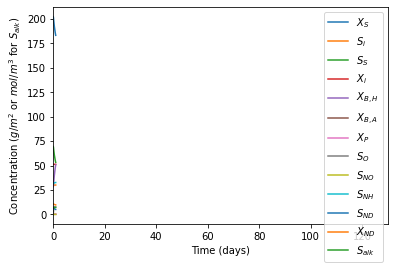

In [16]:
Sie=[]
Sse=[]
Xie=[]
Xse=[]
Xbhe=[]
Xbae=[]
Xpe=[]
Soe=[]
Snoe=[]
Snhe=[]
Snde=[]
Xnde=[]
Salke=[]
t=[0]
for i in _e:
  Sie.append(i[0])
  Sse.append(i[1])
  Xie.append(i[2])
  Xse.append(i[3])
  Xbhe.append(i[4])
  Xbae.append(i[5])
  Xpe.append(i[6])
  Soe.append(i[7])
  Snoe.append(i[8])
  Snhe.append(i[9])
  Snde.append(i[10])
  Xnde.append(i[11])
  Salke.append(i[12])
  t.append(t[-1]+dt)
t=t[:-1]
plota([t,t,t,t,t,t,t,t,t,t,t,t,t,'Time (days)'],[Xse,Sie,Sse,Xie,Xbhe,Xbae,Xpe,Soe,Snoe,Snhe,Snde,Xnde,Salke,'Concentration ($g/m^2$ or $mol/m^3$ for $S_{alk}$)'],['$X_S$','$S_i$','$S_S$','$X_i$','$X_{B,H}$','$X_{B,A}$','$X_P$','$S_O$','$S_{NO}$','$S_{NH}$','$S_{ND}$','$X_{ND}$','$S_{alk}$'])

In [17]:
#zerado
variaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']
un1=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un2=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un3=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un4=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
un5=[[0,0,0,0,0,0,0,0,0,0,0,0,0]]
_o=[[0,0,0,0,0,0,0,0,0,0,0,0,0]] #entrada
c=[[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0,0,0,0,0,0,0]]]
_r=c[0]
_a=un5
_e=c[-1]
#condições do enunciado
variaveis=['Si','Ss','Xi','Xs','Xbh','Xba','Xp','So','Sno','Snh','Snd','Xnd','Salk']
variaveis=[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]

un1=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un2=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un3=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un4=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
un5=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]
_o=[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]] #entrada
c=[[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]],[[30,69.5,51.2,202.32,28.17,0,0,0,0,31.56,6.95,10.59,7]]]
_r=c[0]
_a=un5
_e=c[-1]

In [18]:
#Euler modificado
cnt1=0
while cnt1*dt<df:
  #un_1
  der=derivadas_tanque1()
  cnt2=0
  un1.append([])
  while cnt2<len(der):
    un1[-1].append(un1[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_2
  der=derivadas_tanque2()
  cnt2=0
  un2.append([])
  while cnt2<len(der):
    un2[-1].append(un2[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_3
  der=derivadas_tanque3()
  cnt2=0
  un3.append([])
  while cnt2<len(der):
    un3[-1].append(un3[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_4
  der=derivadas_tanque4()
  cnt2=0
  un4.append([])
  while cnt2<len(der):
    un4[-1].append(un4[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_5
  der=derivadas_tanque5()
  cnt2=0
  un5.append([])
  while cnt2<len(der):
    un5[-1].append(un5[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  _a=un5
  #clarificador
  de=derivadas_clarificador()
  cnt3=0
  while cnt3<len(de): #estágio
    der=de[cnt3]
    cnt2=0
    c[cnt3].append([])
    while cnt2<len(der): #componente
      c[cnt3][-1].append(c[cnt3][-2][cnt2]+der[cnt2]*dt)
      cnt2=cnt2+1
    cnt3=cnt3+1
  _r=c[0]
  _e=c[-1]
  
  #un_1
  der=derivadas_tanque1()
  cnt2=0
  while cnt2<len(der):
    un1[-1][cnt2]=(un1[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_2
  der=derivadas_tanque2()
  cnt2=0
  while cnt2<len(der):
    un2[-1][cnt2]=(un2[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_3
  der=derivadas_tanque3()
  cnt2=0
  while cnt2<len(der):
    un3[-1][cnt2]=(un3[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_4
  der=derivadas_tanque4()
  cnt2=0
  while cnt2<len(der):
    un4[-1][cnt2]=(un4[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  #un_5
  der=derivadas_tanque5()
  cnt2=0
  while cnt2<len(der):
    un5[-1][cnt2]=(un5[-2][cnt2]+der[cnt2]*dt)
    cnt2=cnt2+1
  _a=un5
  #clarificador
  de=derivadas_clarificador()
  cnt3=0
  while cnt3<len(de): #estágio
    der=de[cnt3]
    cnt2=0
    while cnt2<len(der): #componente
      c[cnt3][-1][cnt2]=(c[cnt3][-2][cnt2]+der[cnt2]*dt)
      cnt2=cnt2+1
    cnt3=cnt3+1
  _r=c[0]
  _e=c[-1]
  cnt1=cnt1+1

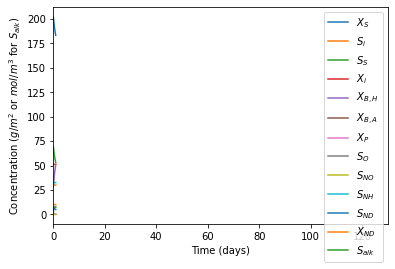

In [19]:
Sim=[]
Ssm=[]
Xim=[]
Xsm=[]
Xbhm=[]
Xbam=[]
Xpm=[]
Som=[]
Snom=[]
Snhm=[]
Sndm=[]
Xndm=[]
Salkm=[]
t=[0]
for i in _e:
  Sim.append(i[0])
  Ssm.append(i[1])
  Xim.append(i[2])
  Xsm.append(i[3])
  Xbhm.append(i[4])
  Xbam.append(i[5])
  Xpm.append(i[6])
  Som.append(i[7])
  Snom.append(i[8])
  Snhm.append(i[9])
  Sndm.append(i[10])
  Xndm.append(i[11])
  Salkm.append(i[12])
  t.append(t[-1]+dt)
t=t[:-1]
plota([t,t,t,t,t,t,t,t,t,t,t,t,t,'Time (days)'],[Xsm,Sim,Ssm,Xim,Xbhm,Xbam,Xpm,Som,Snom,Snhm,Sndm,Xndm,Salkm,'Concentration ($g/m^2$ or $mol/m^3$ for $S_{alk}$)'],['$X_S$','$S_i$','$S_S$','$X_i$','$X_{B,H}$','$X_{B,A}$','$X_P$','$S_O$','$S_{NO}$','$S_{NH}$','$S_{ND}$','$X_{ND}$','$S_{alk}$'])

In [20]:
def plota(x,y,l):
  import matplotlib.pyplot as plt
  cnt1=0
  while cnt1<len(x)-1:
    plt.plot(x[cnt1],y[cnt1],label=l[cnt1])
    cnt1=cnt1+1
  plt.xlabel(x[cnt1])
  plt.ylabel(y[cnt1])
  plt.legend()
  plt.xlim((0,130))
  plt.ylim((-10,10))
  plt.show()

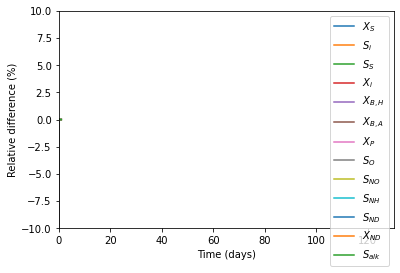

In [21]:
Sid=[]
Ssd=[]
Xid=[]
Xsd=[]
Xbhd=[]
Xbad=[]
Xpd=[]
Sod=[]
Snod=[]
Snhd=[]
Sndd=[]
Xndd=[]
Salkd=[]
cnt1=0
def difrel(a,b):
  if a+b==0:
    return 0
  return (a-b)*2/(a+b)
while cnt1<len(t):
  Sid.append(100*difrel(Sie[cnt1],Sim[cnt1]))
  Ssd.append(100*difrel(Sse[cnt1],Ssm[cnt1]))
  Xid.append(100*difrel(Xie[cnt1],Xim[cnt1]))
  Xsd.append(100*difrel(Xse[cnt1],Xsm[cnt1]))
  Xbhd.append(100*difrel(Xbhe[cnt1],Xbhm[cnt1]))
  Xbad.append(100*difrel(Xbae[cnt1],Xbam[cnt1]))
  Xpd.append(100*difrel(Xpe[cnt1],Xpm[cnt1]))
  Sod.append(100*difrel(Soe[cnt1],Som[cnt1]))
  Snod.append(100*difrel(Snoe[cnt1],Snom[cnt1]))
  Snhd.append(100*difrel(Snhe[cnt1],Snhm[cnt1]))
  Sndd.append(100*difrel(Snde[cnt1],Sndm[cnt1]))
  Xndd.append(100*difrel(Xnde[cnt1],Xndm[cnt1]))
  Salkd.append(100*difrel(Salke[cnt1],Salkm[cnt1]))
  cnt1=cnt1+1
#plota([t,'Time (days)'],[Xsd,'Relative diference (%)'],['$X_S$'])
plota([t,t,t,t,t,t,t,t,t,t,t,t,t,'Time (days)'],[Xsd,Sid,Ssd,Xid,Xbhd,Xbad,Xpd,Sod,Snod,Snhd,Sndd,Xndd,Salkd,'Relative difference (%)'],['$X_S$','$S_i$','$S_S$','$X_i$','$X_{B,H}$','$X_{B,A}$','$X_P$','$S_O$','$S_{NO}$','$S_{NH}$','$S_{ND}$','$X_{ND}$','$S_{alk}$'])

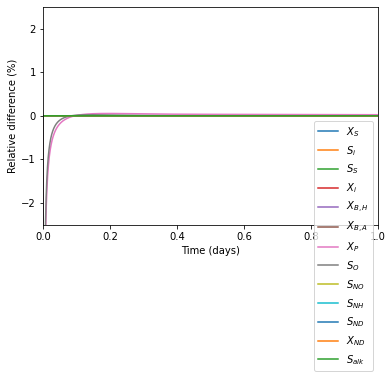

In [22]:
def plota(x,y,l):
  import matplotlib.pyplot as plt
  cnt1=0
  while cnt1<len(x)-1:
    plt.plot(x[cnt1],y[cnt1],label=l[cnt1])
    cnt1=cnt1+1
  plt.xlabel(x[cnt1])
  plt.ylabel(y[cnt1])
  plt.legend(bbox_to_anchor=(1,0.5))
  plt.xlim((0,1))
  plt.ylim((-2.5,2.5))
  plt.show()
plota([t,t,t,t,t,t,t,t,t,t,t,t,t,'Time (days)'],[Xsd,Sid,Ssd,Xid,Xbhd,Xbad,Xpd,Sod,Snod,Snhd,Sndd,Xndd,Salkd,'Relative difference (%)'],['$X_S$','$S_i$','$S_S$','$X_i$','$X_{B,H}$','$X_{B,A}$','$X_P$','$S_O$','$S_{NO}$','$S_{NH}$','$S_{ND}$','$X_{ND}$','$S_{alk}$'])